In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
df = pd.read_csv("framingham.csv")

In [83]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [85]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [86]:
df[df["education"].isna()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
72,0,37,NaN,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0
184,1,67,NaN,0,0.0,0.0,0,0,0,257.0,125.0,67.5,25.95,65.0,69.0,0
213,0,34,NaN,0,0.0,0.0,0,0,0,163.0,107.0,71.0,23.88,73.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,47,NaN,0,0.0,0.0,0,1,0,254.0,137.5,91.0,31.98,75.0,69.0,0
4098,1,37,NaN,1,20.0,0.0,0,0,0,184.0,113.0,81.0,22.16,85.0,63.0,0
4121,0,55,NaN,0,0.0,0.0,0,0,0,240.0,145.0,96.0,26.27,72.0,NaN,0
4122,1,69,NaN,1,23.0,0.0,0,1,0,186.0,179.0,93.0,26.64,72.0,67.0,0


<Axes: >

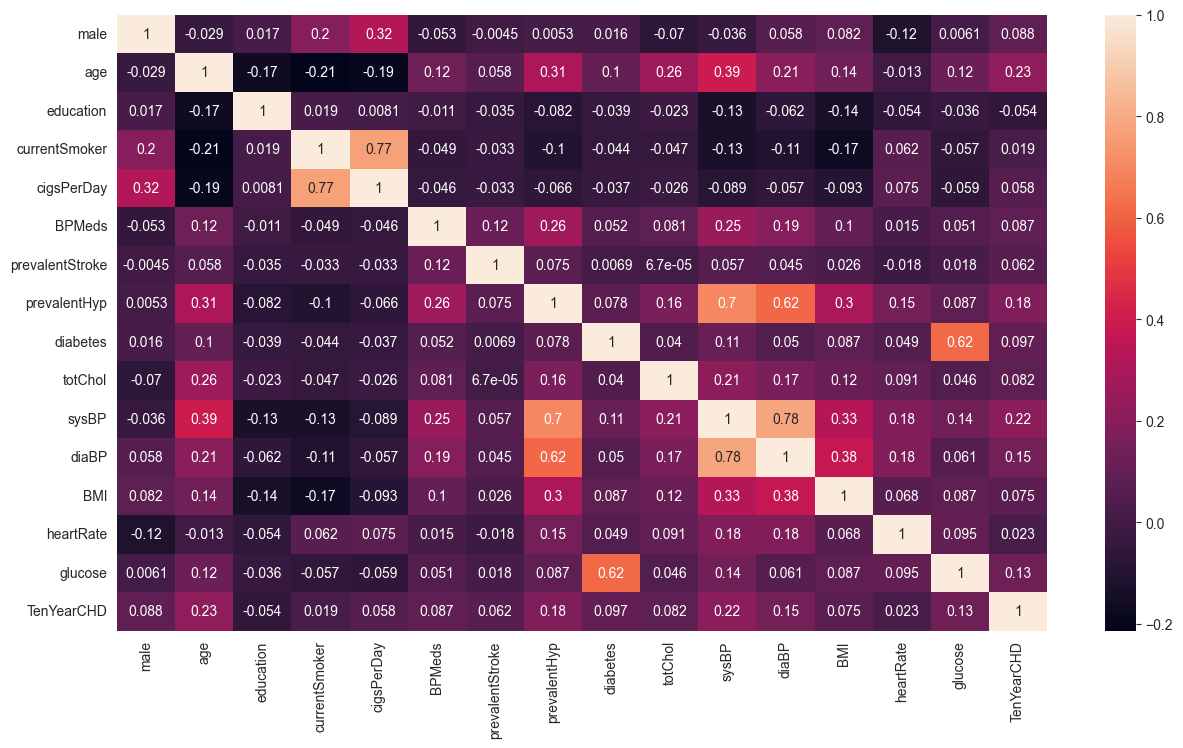

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

education kolonunun sonuç kolonuna etkisi çok düşük. boş değerlerini silebiliriz. yine de 100 den fazla değer silmek istemiyorum mode ile dolduruyorum.

In [88]:
df['education'] = df['education'].fillna(df['education'].median())

In [90]:
df = df.dropna(subset=['cigsPerDay'])

In [93]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())

In [95]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

In [97]:
df = df.dropna(subset=['BMI'])

In [98]:
df = df.dropna(subset=['heartRate'])

In [99]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [100]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [101]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4189.000000,4189.000000,4189.00000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.00000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000
mean,0.429458,49.573884,1.97947,0.491048,9.015756,0.029363,0.005491,0.310575,0.025543,236.69778,132.323705,82.899499,25.800852,75.864407,81.556457,0.150633
std,0.495058,8.567396,1.00764,0.499980,11.929582,0.168841,0.073904,0.462784,0.157787,44.31505,21.971407,11.895414,4.082750,12.023804,22.714403,0.357733
min,0.000000,32.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.00000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.00000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.00000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.00000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.00000,144.000000,89.500000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.00000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.00000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000
